In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione grafici
sns.set_theme(style="whitegrid")
%matplotlib inline

In [4]:
# Caricamento dati da CSV (estratti dal DWH)
df = pd.read_csv("esercizio_sinistri_auto(in).csv")

df.head()

,eta_conducente,anni_patente,cilindrata_cc,fascia_oraria,costo_sinistro
0,56,30,1200,mattina,347.0
1,69,49,1200,pomeriggio,200.0
2,46,20,2500,pomeriggio,1219.0
3,32,13,1600,mattina,711.0
4,60,41,1400,pomeriggio,304.0


In [5]:
df['costo_sinistro'].describe()

count     400.000000
mean      942.075000
std       521.865249
min       200.000000
25%       509.500000
50%       893.500000
75%      1276.250000
max      2500.000000
Name: costo_sinistro, dtype: float64

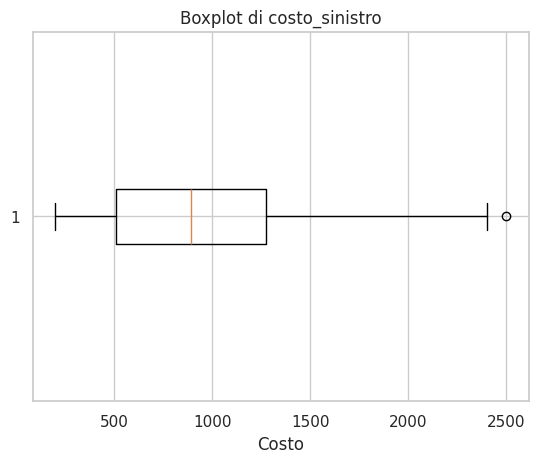

In [7]:
plt.boxplot(df['costo_sinistro'],vert=False)
plt.xlabel('Costo')
plt.title('Boxplot di costo_sinistro')
plt.show()

In [9]:
#Visualizziamo i valori possibili (controllo didattico)
df['fascia_oraria'].value_counts()

fascia_oraria
mattina       122
pomeriggio    119
sera           92
notte          67
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(
    df,
    columns=['fascia_oraria']
)

df.head()


,eta_conducente,anni_patente,cilindrata_cc,costo_sinistro,fascia_oraria_mattina,fascia_oraria_notte,fascia_oraria_pomeriggio,fascia_oraria_sera
0,56,30,1200,347.0,True,False,False,False
1,69,49,1200,200.0,False,False,True,False
2,46,20,2500,1219.0,False,False,True,False
3,32,13,1600,711.0,True,False,False,False
4,60,41,1400,304.0,False,False,True,False


In [17]:
features = [
    'eta_conducente',
    'anni_patente',
    'cilindrata_cc',
    'fascia_oraria_mattina',
    'fascia_oraria_pomeriggio',
    'fascia_oraria_sera',
    'fascia_oraria_notte'
]

target = 'costo_sinistro'

X = df[features]
y = df[target]

print(f"Shape di X: {X.shape}")
print(f"Shape di y: {y.shape}")


Shape di X: (400, 7)
Shape di y: (400,)


In [24]:
from sklearn.model_selection import train_test_split

# Dividiamo: 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")





Training samples: 320
Test samples: 80


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercetta:", model.intercept_)
print("Coefficienti:", dict(zip(features, model.coef_)))


Intercetta: 1244.027798970483
Coefficienti: {'eta_conducente': np.float64(-15.307644035995382), 'anni_patente': np.float64(-2.5668668111721864), 'cilindrata_cc': np.float64(0.3858873128321385), 'fascia_oraria_mattina': np.float64(-191.7130355349788), 'fascia_oraria_pomeriggio': np.float64(-207.64468810247746), 'fascia_oraria_sera': np.float64(-38.50868465076098), 'fascia_oraria_notte': np.float64(437.86640828821743)}


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: errore medio assoluto: {mae:.2f}")
print(f"RMSE: radice quadratico medio: {rmse:.2f}")


MAE: errore medio assoluto: 236.74
RMSE: radice quadratico medio: 296.51


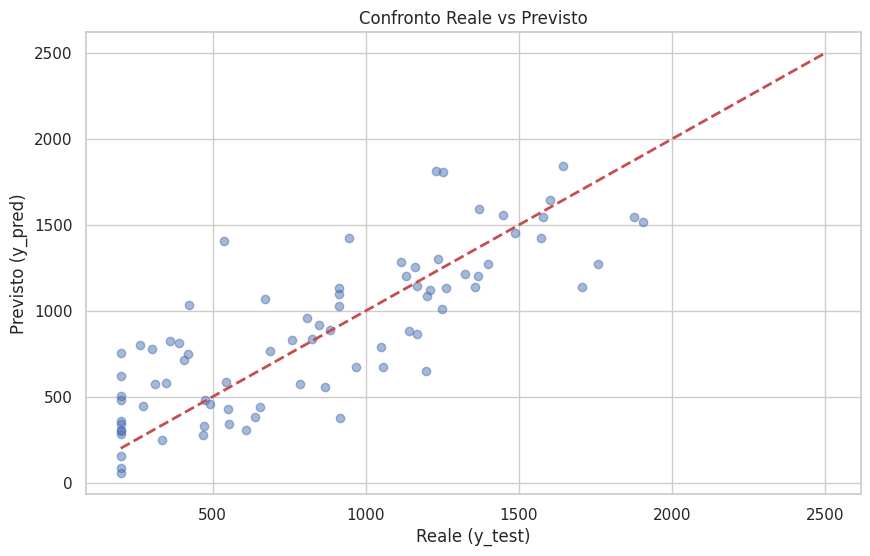

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Linea ideale
plt.xlabel('Reale (y_test)')
plt.ylabel('Previsto (y_pred)')
plt.title('Confronto Reale vs Previsto')
plt.show()
